# Parcial Práctico 2
## MÉTODOS DE MINERÍA DE DATOS PHYTON 8A
## Camilo Rey

In [5]:
pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 185 kB 11.6 MB/s 
     |████████████████████████████████| 9.8 MB 56.4 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196206 sha256=98009f76064c9e65870f919a47bfaa0154901f0f2233da1487a8d878309dcd3a
  Stored in directory: /root/.cache/pip/wheels/11/5a/63/a6d32fc26fa462c731f65480bfb98ff7bd39b8ebcb4bc6c2fe
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=21a4aa4daa1fb7dcd040ec698adeebc57a5493bccd49305bed7b9d7e9b928988
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [6]:
from google.colab import drive
drive.mount('/content/drive')
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from statistics import mode
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import altair as alt
from vega_datasets import data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import csv
from sklearn.model_selection import cross_val_score
from itertools import combinations
from  scipy.stats import chi2_contingency
from numpy.lib.arraysetops import setxor1d
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import pingouin as pg
pd.set_option('display.max_columns', None)
!pip install -U -q PyDrive

Mounted at /content/drive


In [7]:
Matematicas = pd.read_csv('/content/drive/MyDrive/student-mat.csv',
                   sep = ";")

# Punto 1

In [8]:
Matematicas

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4.0,3,4,1,1,3.0,6.0,5.0,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5.0,3,3,1,1,3.0,4.0,5.0,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4.0,3,2,2,3,3.0,10.0,7.0,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3.0,2,2,1,1,5.0,2.0,15.0,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4.0,3,2,1,2,5.0,4.0,6.0,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5.0,5,4,4,5,4.0,11.0,9.0,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2.0,4,5,3,4,2.0,3.0,14.0,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5.0,5,3,3,3,3.0,3.0,10.0,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4.0,4,1,3,4,5.0,0.0,11.0,12,10


In [9]:
print('Matematicas')
print('Individuos:', Matematicas.shape[0])
print('Variables:', Matematicas.shape[1])

Matematicas
Individuos: 395
Variables: 33


*Datos faltantes*

In [10]:
Matematicas.dtypes

school         object
sex            object
age             int64
address        object
famsize        object
Pstatus        object
Medu            int64
Fedu            int64
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime      int64
studytime       int64
failures        int64
schoolsup      object
famsup         object
paid           object
activities     object
nursery        object
higher         object
internet       object
romantic       object
famrel        float64
freetime        int64
goout           int64
Dalc            int64
Walc            int64
health        float64
absences      float64
G1            float64
G2              int64
G3              int64
dtype: object

In [11]:
for col in Matematicas.columns:
    num_missing = Matematicas[col].isnull().sum()
    pct_missing = np.mean(Matematicas[col].isnull())
    print('{} - {}% - {}'.format(col,round(pct_missing*100, 2),num_missing))

school - 0.0% - 0
sex - 0.25% - 1
age - 0.0% - 0
address - 0.51% - 2
famsize - 0.25% - 1
Pstatus - 0.0% - 0
Medu - 0.0% - 0
Fedu - 0.0% - 0
Mjob - 0.25% - 1
Fjob - 0.0% - 0
reason - 0.25% - 1
guardian - 0.0% - 0
traveltime - 0.0% - 0
studytime - 0.0% - 0
failures - 0.0% - 0
schoolsup - 0.25% - 1
famsup - 0.0% - 0
paid - 0.51% - 2
activities - 0.51% - 2
nursery - 0.0% - 0
higher - 0.25% - 1
internet - 0.0% - 0
romantic - 0.0% - 0
famrel - 0.25% - 1
freetime - 0.0% - 0
goout - 0.0% - 0
Dalc - 0.0% - 0
Walc - 0.0% - 0
health - 0.25% - 1
absences - 0.25% - 1
G1 - 0.25% - 1
G2 - 0.0% - 0
G3 - 0.0% - 0


*Imputación*

In [12]:
v_fal_cuan = ['absences','G1']

In [13]:
v_fal_cuali = ['sex', 'address', 'famsize', 'Mjob', 'reason', 'schoolsup', 'paid', 'activities', 'higher',
'famrel', 'health' , 'absences']

**Cuantitativas**

In [ ]:
Matematicas['absences'][Matematicas['absences'].isna()] = Matematicas['absences'].mean()
Matematicas['G1'][Matematicas['G1'].isna()] = Matematicas['G1'].mean()

**Cualitativas**

In [ ]:
Matematicas['sex'][Matematicas['sex'].isna()] = mode(Matematicas['sex'])
Matematicas['address'][Matematicas['address'].isna()] = mode(Matematicas['address'])
Matematicas['famsize'][Matematicas['famsize'].isna()] = mode(Matematicas['famsize'])
Matematicas['Mjob'][Matematicas['Mjob'].isna()] = mode(Matematicas['Mjob'])
Matematicas['reason'][Matematicas['reason'].isna()] = mode(Matematicas['reason'])
Matematicas['schoolsup'][Matematicas['schoolsup'].isna()] = mode(Matematicas['schoolsup'])
Matematicas['paid'][Matematicas['paid'].isna()] = mode(Matematicas['paid'])
Matematicas['activities'][Matematicas['activities'].isna()] = mode(Matematicas['activities'])
Matematicas['higher'][Matematicas['higher'].isna()] = mode(Matematicas['higher'])
Matematicas['famrel'][Matematicas['famrel'].isna()] = mode(Matematicas['famrel'])
Matematicas['health'][Matematicas['health'].isna()] = mode(Matematicas['health'])
Matematicas['absences'][Matematicas['absences'].isna()] = mode(Matematicas['absences'])


In [16]:
for col in Matematicas.columns:
    num_missing = Matematicas[col].isnull().sum()
    pct_missing = np.mean(Matematicas[col].isnull())
    print('{} - {}% - {}'.format(col,round(pct_missing*100, 2),num_missing))

school - 0.0% - 0
sex - 0.0% - 0
age - 0.0% - 0
address - 0.0% - 0
famsize - 0.0% - 0
Pstatus - 0.0% - 0
Medu - 0.0% - 0
Fedu - 0.0% - 0
Mjob - 0.0% - 0
Fjob - 0.0% - 0
reason - 0.0% - 0
guardian - 0.0% - 0
traveltime - 0.0% - 0
studytime - 0.0% - 0
failures - 0.0% - 0
schoolsup - 0.0% - 0
famsup - 0.0% - 0
paid - 0.0% - 0
activities - 0.0% - 0
nursery - 0.0% - 0
higher - 0.0% - 0
internet - 0.0% - 0
romantic - 0.0% - 0
famrel - 0.0% - 0
freetime - 0.0% - 0
goout - 0.0% - 0
Dalc - 0.0% - 0
Walc - 0.0% - 0
health - 0.0% - 0
absences - 0.0% - 0
G1 - 0.0% - 0
G2 - 0.0% - 0
G3 - 0.0% - 0


*Consistencia de datos*

In [17]:
Matematicas[['age','absences', 'G1', 'G2', 'G3']].describe() 

,age,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,5.723350,10.916244,10.764557,10.440506
std,1.276043,7.997913,3.315950,3.858244,4.628688
min,15.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,75.000000,19.000000,28.000000,24.000000


In [ ]:
Matematicas['G2'][(Matematicas['G2'] > 20)] = Matematicas['G2'].mean()

In [ ]:
Matematicas['G3'][(Matematicas['G3'] > 20)] = Matematicas['G3'].mean()

In [ ]:
Matematicas['sex'][Matematicas['sex'] == 'B'] = 'F'
Matematicas['Pstatus'][Matematicas['Pstatus'] == 'Z'] = 'T'



In [21]:
v_categoricas = ['school', 'traveltime', 'studytime', 'failures',  'sex',  'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet','romantic','famrel','freetime', 'goout', 'Dalc', 'Walc', 'health']

In [22]:
for j in v_categoricas:
    print(Matematicas[j].value_counts())

GP    349
MS     46
Name: school, dtype: int64
1    257
2    107
3     23
4      8
Name: traveltime, dtype: int64
2    198
1    105
3     65
4     27
Name: studytime, dtype: int64
0    312
1     50
2     17
3     16
Name: failures, dtype: int64
F    209
M    186
Name: sex, dtype: int64
U    308
R     87
Name: address, dtype: int64
GT3    282
LE3    113
Name: famsize, dtype: int64
T    354
A     41
Name: Pstatus, dtype: int64
4    131
2    103
3     99
1     59
0      3
Name: Medu, dtype: int64
2    115
3    100
4     96
1     82
0      2
Name: Fedu, dtype: int64
other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64
other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64
course        146
home          108
reputation    104
other          36
Reputation      1
Name: reason, dtype: int64
mother    272
father     90
other      32
Mother      1
Name: guardian, dtype: int64
no     343
yes     

In [ ]:
Matematicas['internet'][Matematicas['internet'] == 'No'] = 'no'
Matematicas['higher'][Matematicas['higher'] == 'Yes'] = 'yes'
Matematicas['nursery'][Matematicas['nursery'] == 'Yes'] = 'yes'
Matematicas['nursery'][Matematicas['nursery'] == 'No'] = 'no'
Matematicas['activities'][Matematicas['activities'] == 'No'] = 'no'
Matematicas['paid'][Matematicas['paid'] == 'No'] = 'no'
Matematicas['famsup'][Matematicas['famsup'] == 'No'] = 'no'
Matematicas['schoolsup'][Matematicas['schoolsup'] == 'No'] = 'no'

In [24]:
for j in v_categoricas:
    print(Matematicas[j].value_counts())

GP    349
MS     46
Name: school, dtype: int64
1    257
2    107
3     23
4      8
Name: traveltime, dtype: int64
2    198
1    105
3     65
4     27
Name: studytime, dtype: int64
0    312
1     50
2     17
3     16
Name: failures, dtype: int64
F    209
M    186
Name: sex, dtype: int64
U    308
R     87
Name: address, dtype: int64
GT3    282
LE3    113
Name: famsize, dtype: int64
T    354
A     41
Name: Pstatus, dtype: int64
4    131
2    103
3     99
1     59
0      3
Name: Medu, dtype: int64
2    115
3    100
4     96
1     82
0      2
Name: Fedu, dtype: int64
other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64
other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64
course        146
home          108
reputation    104
other          36
Reputation      1
Name: reason, dtype: int64
mother    272
father     90
other      32
Mother      1
Name: guardian, dtype: int64
no     344
yes     

De las 33 variables que componen la Base de datos, 14 Variables tienen al menos un
registro faltante, de las cuales 12 son cualitativas y 2 cuantitativas, se imputaron
estos valores por medio de la moda y media respectivamente. En la consistencia de
datos las variables G2 y G3 tomaban valores mayores 20, posiblemente por un error
en la digitación de estos, por lo tanto, se cambiaron estos valores por la media
de la variable, además, en las variables cualitativas ocurrió que se digitaron
modalidades inexistentes, esta se remplazó por la moda de la variable
, por último, se arreglaron los problemas de digitación que existían 
en las variables cualitativas, donde se tenían mismas modalidades con y sin 
mayúscula produciendo así que el programa las entienda como diferentes.


# Punto 2

*Variable de interes*

De los individuos analizados, la nota mínima que se obtuvo es de $0$, mientras que la máxima nota es de $20$, que es la máxima que se podría alcanzar, el promedio de la nota del tercer periodo es $10.406$ unidades. La distribución de las notas es aparentemente simétrica, pese a un pico que se observa en las notas cercanas a cero, además, no cuenta con la posible presencia de valores atípicos.

In [26]:
Matematicas['G3'].describe()

count    395.000000
mean      10.406178
std        4.577873
min        0.000000
25%        8.000000
50%       11.000000
75%       13.500000
max       20.000000
Name: G3, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f859a851890>,
 'caps': [<matplotlib.lines.Line2D at 0x7f859a85c350>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f859a851350>],
 'medians': [<matplotlib.lines.Line2D at 0x7f859a85ce10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f859a862390>],
 'means': []}

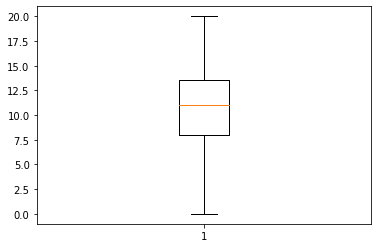

In [27]:
plt.boxplot(Matematicas['G3'])

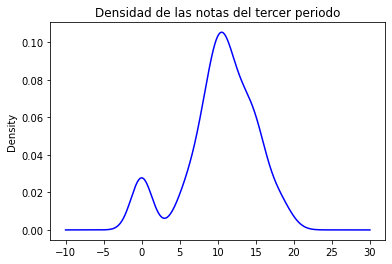

In [28]:
Matematicas['G3'].plot.density(color='blue') 
plt.title('Densidad de las notas del tercer periodo') 
plt.show()

*Variables cuantitativas*

In [ ]:
v_numericas =  ['age','absences', 'G1', 'G2', 'G3']
v_categoricas

In [30]:
Matematicas[v_numericas].describe()

,age,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,5.723350,10.916244,10.720923,10.406178
std,1.276043,7.997913,3.315950,3.759013,4.577873
min,15.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,8.000000,13.000000,13.000000,13.500000
max,22.000000,75.000000,19.000000,19.000000,20.000000


En la siguiente matriz de correlaciones se observa que la variable de interés $G3$ tiene una correlación alta con las notas de los periodos anteriores $G1$ correspondiente a la nota del primer corte y $G2$ nota del segundo corte. Además, entre estas dos variables se presenta también una alta asociación positiva. De manera gráfica se observa que estas relaciones son lineales, pese a algunos puntos que parecen atípicos.

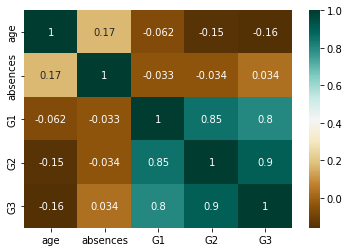

In [31]:
sns.heatmap(Matematicas[v_numericas].corr(),cmap="BrBG",annot=True)

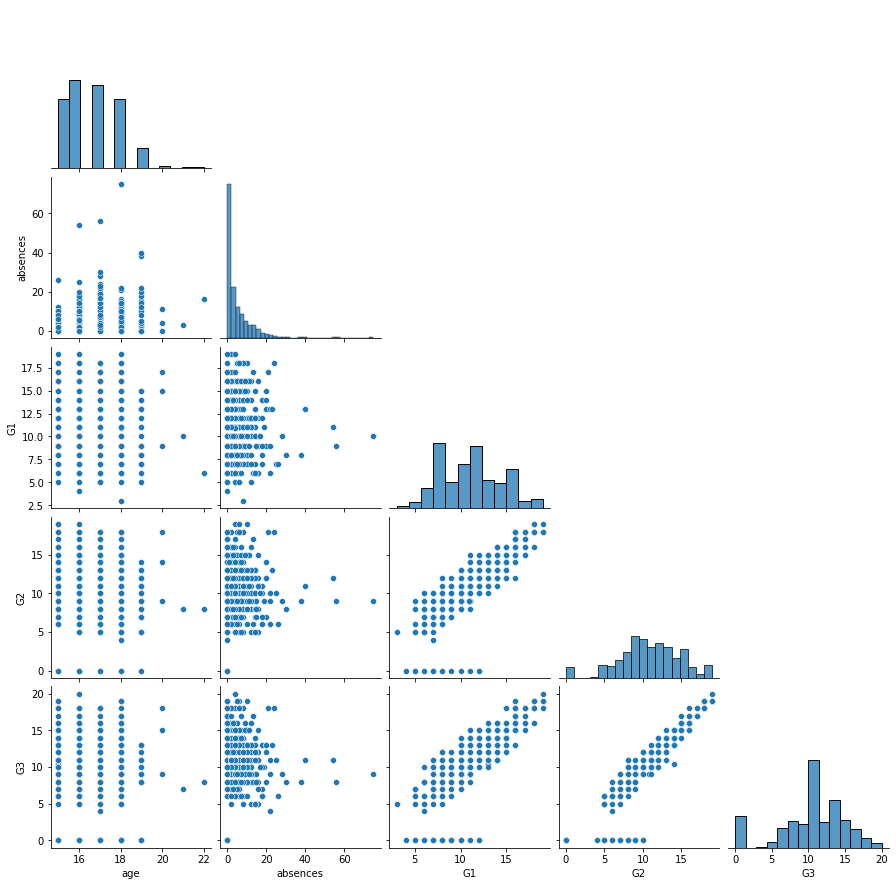

In [32]:
sns.pairplot(Matematicas[v_numericas], diag_kind = 'hist', corner = True)

En este mismo sentido, las variables cuantitativas seleccionadas para la predicción de la nota del tercer periodo, son las notas de los dos períodos inmediatamente anteriores, dado que estos dos predictores están altamente correlacionadas, por lo tanto, se creará una variable adicional que es el promedio de las notas $G_1$ y $G_2$ y se espera esté correlacionada con $G_3$.

In [33]:
Matematicas['Promedio'] = (Matematicas['G1'] + Matematicas['G2']) / 2

In [34]:
display(pg.corr(Matematicas['Promedio'], Matematicas['G3'], method='pearson'))

,n,r,CI95%,p-val,BF10,power
pearson,395,0.889268,"[0.87, 0.91]",1.401833e-135,4.29e+131,1.0


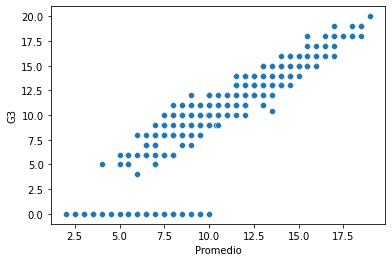

In [35]:
sns.scatterplot(data = Matematicas,  x= 'Promedio' , y = 'G3')

Con lo cual, se observa que el promedio de las notas $G_1$ y $G_2$ tiene una alta correlación positiva con las notas del periodo tres, estadísticamente diferente de cero, gráficamente se observa que esta relación es lineal.

*Variables cualitativas*
 
Para analizar la asociación que tienen las variables cualitativas con las notas del periodo tres, se realiza una prueba $\chi^2$, para contrastar si existe independencia entre las variable o, si por el contrario, existe algún tipo de dependencia que pueda ayudar para la estimación de $G_3$ en el modelo.


In [36]:
valores_p = []

In [37]:
for i in v_categoricas:
  contingencia = pd.crosstab(Matematicas[i], Matematicas['G3'])
  prueba = chi2_contingency(contingencia)
  valores_p.append(round(prueba[1], 2))

In [38]:
Boolean = pd.DataFrame(valores_p) < 0.05

In [39]:
pd.DataFrame(v_categoricas, Boolean)

,0
"(False,)",school
"(False,)",traveltime
"(False,)",studytime
"(True,)",failures
"(False,)",sex
"(False,)",address
"(False,)",famsize
"(False,)",Pstatus
"(False,)",Medu
"(False,)",Fedu


A un nivel de significancia del $5$%, para los contrastes realizados con las variables failures, Mjob,guardian,schoolsup,paid, romantic se rechazó la hipótesis nula, en favor de que estas variables tienen algún tipo de dependencia con la nota de matemáticas del tercer periodo.

Dado el análisis exploratorio realizado, se considera que las variables relevantes para el modelo son las notas del periodo 1 y 2 en matemáticas, que dada la alta correlación que hay entre estas dos variables, se trabajara el promedio para resumir la información de ambas fuentes. Otras variables relevantes resultaron ser el número de fallas, el trabajo de la madre, el tutor del estudiante, si el estudiante tiene apoyo educativo adicional, si paga clases extra de matemáticas y si está en una relación. Únicamente para la estimación del modelo se descartaron la variable 'failures' y 'romantic'.

# Punto 3
 
Se utilizará el algoritmo de regresión con Ridge, dado que, como previamente se examinaron las variables que se utilizaran como explicativas, todas están se consideran importantes en el modelo, por ende, no se van a seleccionar variables sino únicamente a penalizar los coeficientes de estas. Los parámetros que se van a variar, con la finalidad de obtener el mínimo valor en el $MAE$ y el $RMSE$ son:
 
- Alpha: Controlador de la fuerza de regularización
- Tol: precisión de la solución

In [40]:
Base = Matematicas[['Promedio', 'Mjob', 'guardian', 'schoolsup', 'paid', 'romantic']]

In [ ]:
Base['guardian'][Base['guardian'] == 'Mother'] = 'mother'

In [42]:
Mjob_dummy = pd.get_dummies(Base['Mjob'])
guardian_dummy = pd.get_dummies(Base['guardian'])
schoolsup_dummy = pd.get_dummies(Base['schoolsup'])
paid_dummy = pd.get_dummies(Base['paid'])

In [43]:
Mjob_dummy = Mjob_dummy.loc[:,['at_home', 'health',	'services',	'teacher']] # other
guardian_dummy = guardian_dummy.loc[:,['father',	'mother']] # other
schoolsup_dummy = schoolsup_dummy.loc[:,['yes']] # no
paid_dummy = paid_dummy.loc[:,['yes']] # no

In [44]:
promedio_mean, promedio_std = Base['Promedio'].mean(), Base['Promedio'].std()
promedio = (Base['Promedio'] - promedio_mean) / promedio_std

In [45]:
y = Matematicas['G3']

In [46]:
X = np.c_[promedio, Mjob_dummy, guardian_dummy, schoolsup_dummy, paid_dummy]

*Ridge con toda la muestra*

In [73]:
from sklearn.linear_model import Ridge

In [74]:
tol = [0.002, 0.5, 0.9]
alpha = [0.1, 10 , 100] 
H_parametros = pd.DataFrame()
H_parametros['tol'] = tol
H_parametros['alpha'] = alpha

In [75]:
H_parametros

,tol,alpha
0,0.002,0.1
1,0.500,10.0
2,0.900,100.0


In [76]:
grid = pd.DataFrame()
tol = []
alpha = []

In [77]:
for i in range(3):
  for j in range(3):
    tol.append(H_parametros['tol'][i])
    alpha.append(H_parametros['alpha'][j])

In [78]:
grid['tol'] = tol ; grid['alpha'] = alpha

In [79]:
MAE = [] ; RMSE = []

In [80]:
for i in range(9):
  ridgereg = Ridge(alpha = grid['alpha'][i], tol = grid['tol'][i])
  ridgereg.fit(X,y)
  y_pred = ridgereg.predict(X)
  MAE.append(metrics.mean_absolute_error(y, y_pred))
  RMSE.append(np.sqrt(metrics.mean_squared_error(y, y_pred)))

In [81]:
Ridge_1 = pd.DataFrame(grid)
Ridge_1['MAE'] = MAE
Ridge_1['RMSE'] = RMSE

In [82]:
Ridge_1

,tol,alpha,MAE,RMSE
0,0.002,0.1,1.386669,2.047068
1,0.002,10.0,1.363209,2.052166
2,0.002,100.0,1.409143,2.229313
3,0.500,0.1,1.386669,2.047068
4,0.500,10.0,1.363209,2.052166
5,0.500,100.0,1.409143,2.229313
6,0.900,0.1,1.386669,2.047068
7,0.900,10.0,1.363209,2.052166
8,0.900,100.0,1.409143,2.229313


Cuando se estima el modelo con toda la muestra, la configuración con la cual se obtienen el menor $MAE$ y un $RMSE$ aceptable es donde se utiliza tol = 0.002 y alpha = 10.

*Ridge con datos de entrenamiento*

In [83]:
MAE_train = [] ; RMSE_train = []

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [85]:
for i in range(9):
  ridgereg = Ridge(alpha = grid['alpha'][i], tol = grid['tol'][i])
  ridgereg.fit(X_train,y_train)
  y_pred = ridgereg.predict(X_train)
  MAE_train.append(metrics.mean_absolute_error(y_train, y_pred))
  RMSE_train.append(np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

In [86]:
Ridge_2 = pd.DataFrame(grid)
Ridge_2['MAE'] = MAE_train 
Ridge_2['RMSE'] = RMSE_train
Ridge_2

,tol,alpha,MAE,RMSE
0,0.002,0.1,1.330150,1.998611
1,0.002,10.0,1.298832,2.005929
2,0.002,100.0,1.382668,2.235187
3,0.500,0.1,1.330150,1.998611
4,0.500,10.0,1.298832,2.005929
5,0.500,100.0,1.382668,2.235187
6,0.900,0.1,1.330150,1.998611
7,0.900,10.0,1.298832,2.005929
8,0.900,100.0,1.382668,2.235187


Cuando se estima el modelo con toda unicamente los datos de entrenamiento, la configuración con la cual se obtienen el menor $MAE$ y un $RMSE$ aceptable es donde se utiliza tol = 0.002 y alpha = 10.

*Ridge con K fold Cross Validation*

In [87]:
MAE_k_5 = [] ; RMSE_k_5  = [] ; MAE_k_10 = [] ; RMSE_k_10 = []

In [88]:
for i in range(9):

  ridgereg = Ridge(alpha = grid['alpha'][i], tol = grid['tol'][i])
  ridgereg.fit(X_train,y_train)
  cv = KFold(n_splits = 5, random_state=79, shuffle=True)
  scores = cross_val_score(ridgereg, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
  y_pred = ridgereg.predict(X_test)
  MAE_k_5.append(metrics.mean_absolute_error(y_test, y_pred))
  scores = cross_val_score(ridgereg, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
  y_pred = ridgereg.predict(X_test)
  RMSE_k_5.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
  
  
  cv = KFold(n_splits = 10, random_state=79, shuffle=True)
  scores = cross_val_score(ridgereg, X_train, X_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
  y_pred = ridgereg.predict(X_test)
  MAE_k_10.append(metrics.mean_absolute_error(y_test, y_pred))
  scores = cross_val_score(ridgereg, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
  y_pred = ridgereg.predict(X_test)
  RMSE_k_10.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [89]:
Ridge_3 = pd.DataFrame(grid)
Ridge_3['MAE'] = MAE_k_5 
Ridge_3['RMSE'] = RMSE_k_5
Ridge_3

,tol,alpha,MAE,RMSE
0,0.002,0.1,1.468676,2.304804
1,0.002,10.0,1.464730,2.340853
2,0.002,100.0,1.724902,2.734544
3,0.500,0.1,1.468676,2.304804
4,0.500,10.0,1.464730,2.340853
5,0.500,100.0,1.724902,2.734544
6,0.900,0.1,1.468676,2.304804
7,0.900,10.0,1.464730,2.340853
8,0.900,100.0,1.724902,2.734544


In [90]:
Ridge_4 = pd.DataFrame(grid)
Ridge_4['MAE'] = MAE_k_10
Ridge_4['RMSE'] = RMSE_k_10
Ridge_4

,tol,alpha,MAE,RMSE
0,0.002,0.1,1.468676,2.304804
1,0.002,10.0,1.464730,2.340853
2,0.002,100.0,1.724902,2.734544
3,0.500,0.1,1.468676,2.304804
4,0.500,10.0,1.464730,2.340853
5,0.500,100.0,1.724902,2.734544
6,0.900,0.1,1.468676,2.304804
7,0.900,10.0,1.464730,2.340853
8,0.900,100.0,1.724902,2.734544


Cuando se estima el modelo en la partición de entrenamiento utilizando un K Fold Cross Validation con $K = 5$ y $K = 1$, la configuración con la cual se obtienen el menor $MAE$ y un $RMSE$ aceptable es donde se utiliza tol = 0.002 y alpha = 10.

# Punto 4



## ¿Cuál fue el mejor modelo según las métricas anteriormente mencionadas? ¿Qué valores de los parámetros se seleccionaron para lograr dicho resultado?


Comparado el comportamiento de todos los modelos propuestos para la muestra completa, particionada y con K Fold Cross Validation, en cada uno de ellos tomando como criterio principalmente el Error Absoluto Medio se llegó a la conclusión de que el mejor modelo es aquel que, indiferentemente del valor de tol que parece no presentar una diferencia en las métricas si su valor se modifica, es donde $\alpha$ es igual a 10.
## Modelo

In [91]:
 ridgereg = Ridge(alpha = 10, tol = 0.002)
 ridgereg.fit(X_train,y_train)

Ridge(alpha=10, tol=0.002)

In [92]:
 ridgereg.coef_.round(2)

array([ 3.84, -0.26,  0.06, -0.05, -0.27,  0.22,  0.63,  0.41,  0.21])

In [93]:
 ridgereg.intercept_.round(2)

10.0

Teniendo en cuenta lo anterior, el modelo seleccionado para la estimación de la nota del tercer periodo en matematicas es:

$$\hat{y}_{G3}=10+3.84x_{promedio}-0.26x_{casa} -0.06x_{salud} -0.05x_{servicio} -0.27x_{profesor}+0.22x_{padre}+ 0.63x_{madre}+0.41x_{apoyo}+0.21x_{Clases Extra}$$

*Interpretación de los parámetros*
- Intercepto: Para un individuo que obtuvo en las notas de matemáticas del primer y segundo periodo cero, el trabajo de la madre es otro, su tutor es alguien diferente a su padre o su madre, no tiene apoyo educativo adicional y no toma clases extra en matemáticas, se estima, la calificación que tendrá en tercer corte será en promedio $10$ puntos.

- Promedio: Se estima que, cuando el promedio de las notas del periodo uno y dos aumenta en una unidad, la nota del corte 3 aumente en 3.84 unidades, manteniendo las demás variables constantes en promedio.

- Trabajo de la madre: Cuando la madre se dedica a labores de la casa, la nota en el tercer corte del niño disminuye en 0.26 unidades en comparación si la madre trabajara en otra cosa diferente a las opciones de la pregunta. Por otra parte, si el trabajo de la madre es el sector salud, la nota del niño disminuye en 0.06 unidades en comparación si la madre trabajara en otra cosa, por último, si la madre es profesora, se espera que la nota del niño disminuya en 0.27 unidades en comparación si la madre trabajara en otra cosa. todas estas interpretaciones, manteniendo las demás variables constantes.

- Tutor del estudiante: Cuando el tutor del estudiante es el padre, se espera que la nota de este aumente en $0.22$ unidades en comparación a si el tutor fuera otro, manteniendo las demás variables constantes. Por otra parte, si el tutor es la madre, se espera que la nota aumente en $0.63$ unidades en comparación a si el tutor es otro, manteniendo tambien las demas variables constantes.

- Apoyo educativo adicional: Si el estudiante tiene apoyo educativo adicional, se espera que su nota aumente en promedio 0.41 unidades en comparación a si no cuenta con este apoyo, manteniendo las demás variables constantes.

- Clases extra de matemáticas: Si el estudiante toma clases extra de matemáticas, se espera que en promedio su nota aumente en 0.21 unidades en comparación a si no las toma, manteniendo constante las demás variables.